In [370]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [371]:
df = pd.read_csv("listings.csv")

In [372]:
df.sample()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
74,538723,https://www.airbnb.com/rooms/538723,20230605223331,2023-06-06,previous scrape,Condo in Amsterdam · ★4.84 · 2 bedrooms · 2 be...,"A great place to stay for couples, friends or ...","Although we live in a very quiet neighborhood,...",https://a0.muscache.com/pictures/6962281/1793a...,356740,...,4.82,4.58,4.7,0363 D990 F92F DECF 88D4,f,1,1,0,0,0.43


In [373]:
df = df[['host_name', 'host_location', 'room_type',  
       'bathrooms_text', 'bedrooms', 'beds',  'price', 'neighbourhood']]

In [374]:
df.sample()

,host_name,host_location,room_type,bathrooms_text,bedrooms,beds,price,neighbourhood
4153,Karel,"Amsterdam, Netherlands",Entire home/apt,1.5 baths,2.0,2.0,$400.00,"Amsterdam, Noord-Holland, Netherlands"


# Preprocessing Data

In [375]:
df.shape

(7608, 8)

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   host_name       7608 non-null   object 
 1   host_location   6786 non-null   object 
 2   room_type       7608 non-null   object 
 3   bathrooms_text  7600 non-null   object 
 4   bedrooms        6228 non-null   float64
 5   beds            7533 non-null   float64
 6   price           7608 non-null   object 
 7   neighbourhood   4838 non-null   object 
dtypes: float64(2), object(6)
memory usage: 475.6+ KB


In [377]:
df['price'] = df['price'].apply(lambda x : x.replace("$", "").replace(",", ""))
df['price'] = pd.to_numeric(df['price'])

In [378]:
df.sample()

,host_name,host_location,room_type,bathrooms_text,bedrooms,beds,price,neighbourhood
7464,Andrea,NaN,Entire home/apt,1 bath,1.0,1.0,190.0,NaN


In [379]:
df.isna().sum()

host_name            0
host_location      822
room_type            0
bathrooms_text       8
bedrooms          1380
beds                75
price                0
neighbourhood     2770
dtype: int64

In [380]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [381]:
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().loc[0])

In [382]:
df.shape

(7608, 8)

In [383]:
df.duplicated().sum()

108

In [338]:
df.drop_duplicates(inplace=True)

# chart of data

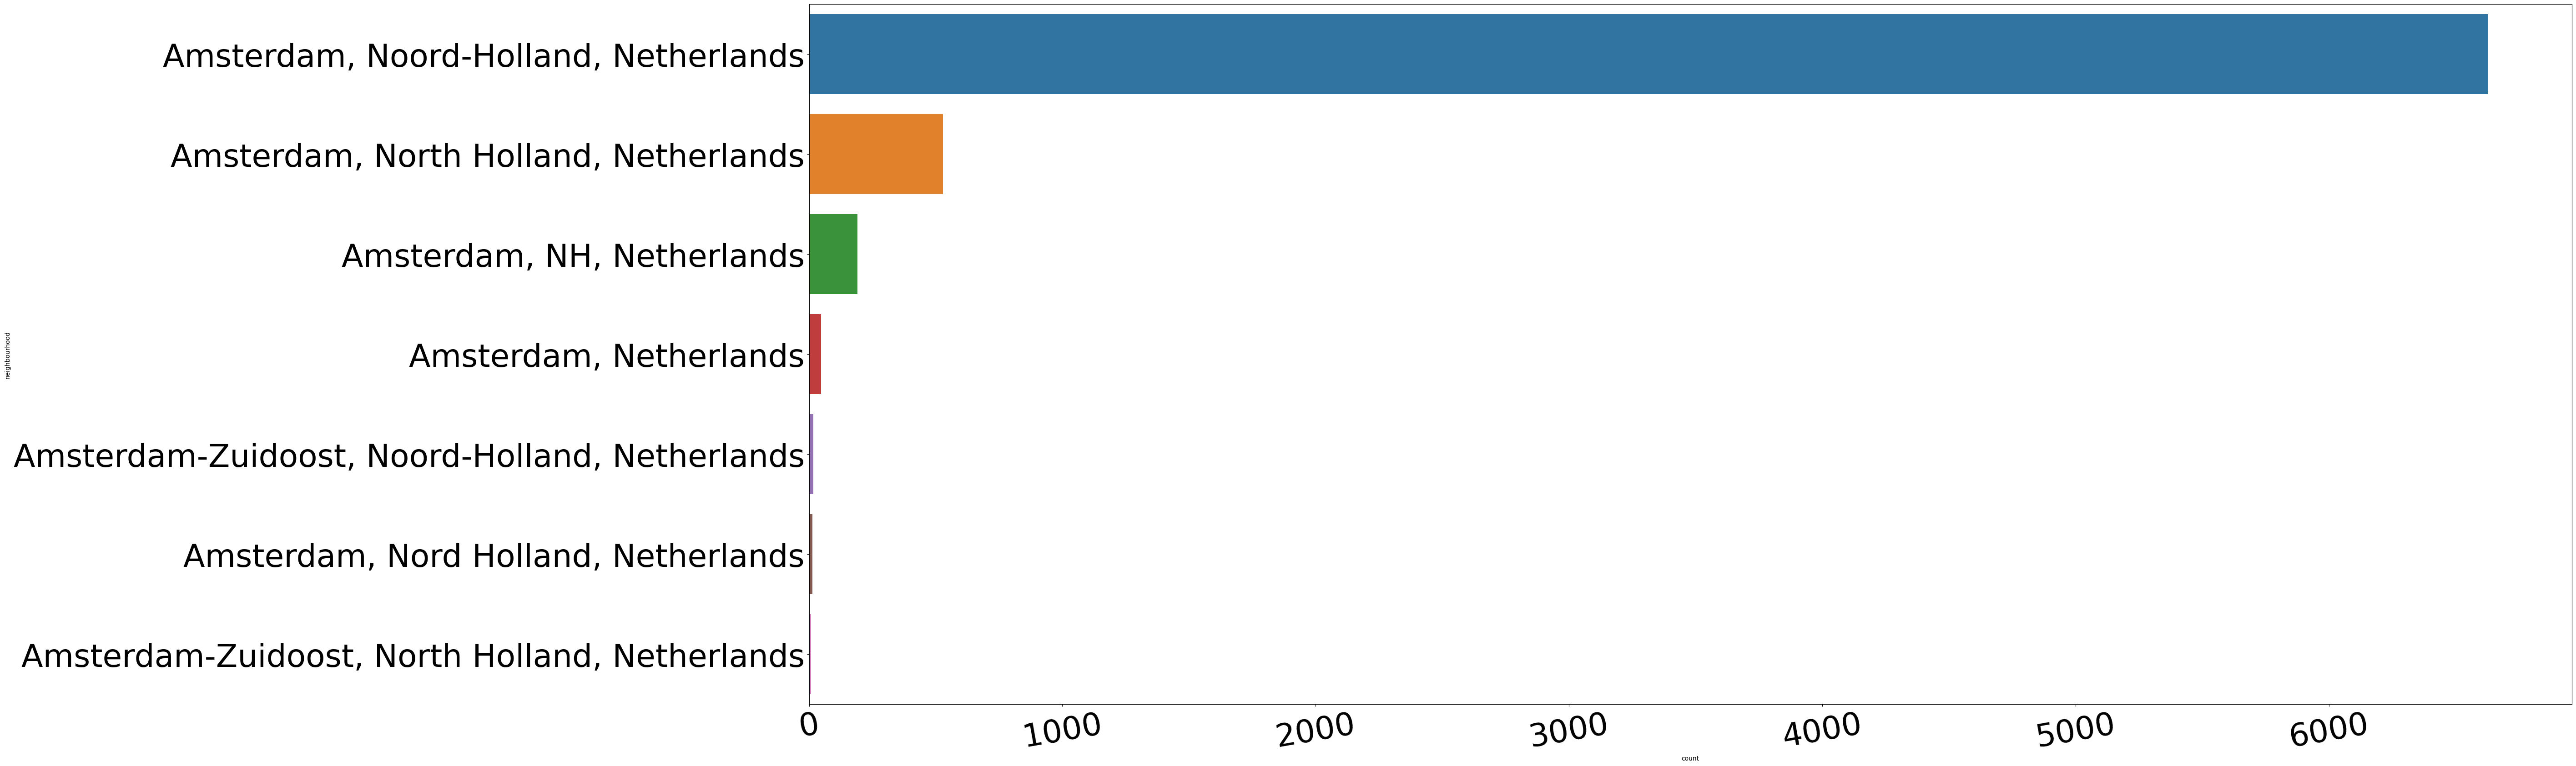

In [354]:
plt.figure(figsize=(50,20))
sb.countplot(y = df['neighbourhood'], order = df['neighbourhood'].value_counts()[:7].index)
plt.tick_params(labelsize=50)
plt.xticks(rotation=10);

In [253]:
df.sample()

,host_name,host_location,room_type,bathrooms_text,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
7571,Nienke,"Amsterdam, Netherlands",Entire home/apt,2 baths,3.0,4.0,350.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [289]:
order = df['host_location'].value_counts().sort_values(ascending=False)[:10]

In [290]:
order

Amsterdam, Netherlands     7064
Netherlands                 216
London, United Kingdom       18
Amstelveen, Netherlands      15
Utrecht, Netherlands         13
The Hague, Netherlands        9
Haarlem, Netherlands          8
Nederland, CO                 8
Delft, Netherlands            7
New York, NY                  7
Name: host_location, dtype: int64

<Axes: >

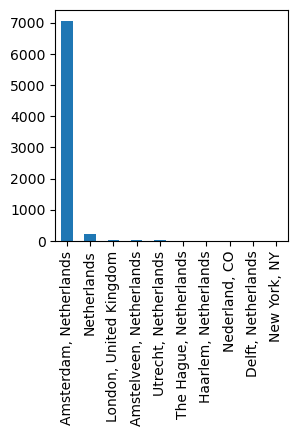

In [369]:
plt.figure(figsize=(3, 3))
order.plot(kind='bar')

Amsterdam, Netherlands is the best location "I recommend increasing interest in this location because it is in high demand"

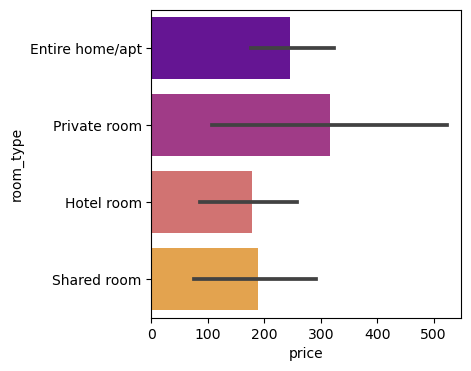

In [367]:
plt.figure(figsize=(4, 4))
sb.barplot(data = df, y ='room_type', x ='price', palette ='plasma', estimator = np.std);

private is the best room type "I recommend increasing private room  because it is in high demand"

In [318]:
order_bathrooms = df['bathrooms_text'].value_counts()[:5]

(0.0, 1000.0)

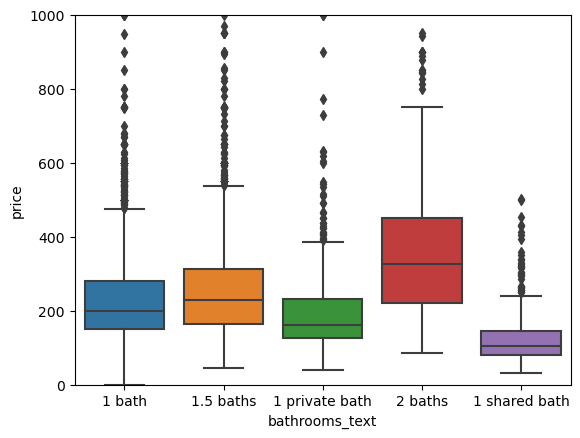

In [359]:
sb.boxplot(data = df, x ='bathrooms_text', y ='price', order=order_bathrooms.index)
plt.ylim(0, 1000)

2 baths is the best bathrooms "I recommend increasing bathrooms  and pay attention another bathroom"